# Removing outliers

The next steps are to remove any outliers from the columns. This requires a somewhat subtle approach, and steps need to be taken to differentiate genuine outliers from relevant datapoints.

To illustrate what I mean, let's look at the histogram for the last_payment_amount

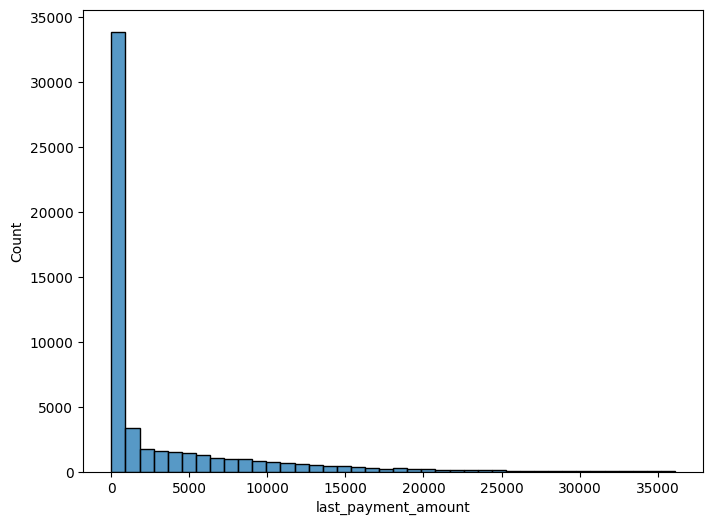

In [1]:
from data_imputer import Plotter
import pandas as pd

df = pd.read_csv('unskewed_data.csv')
#print(df.head())
graph = Plotter(df)

graph.check_outliers('last_payment_amount', 'histogram')

#TODO victims are: annual_inc(?), open_accounts(?), total_payment, total_rec_int, total_rec_late_fee(?), 

Despite the majority of payment amounts being on the lower end, the distribution follows a clear negative trend as the payment amount increases. Indeed, if we look at the (very chaotic) scatter plot, it's safe to say no points in this column are genuine outliers.

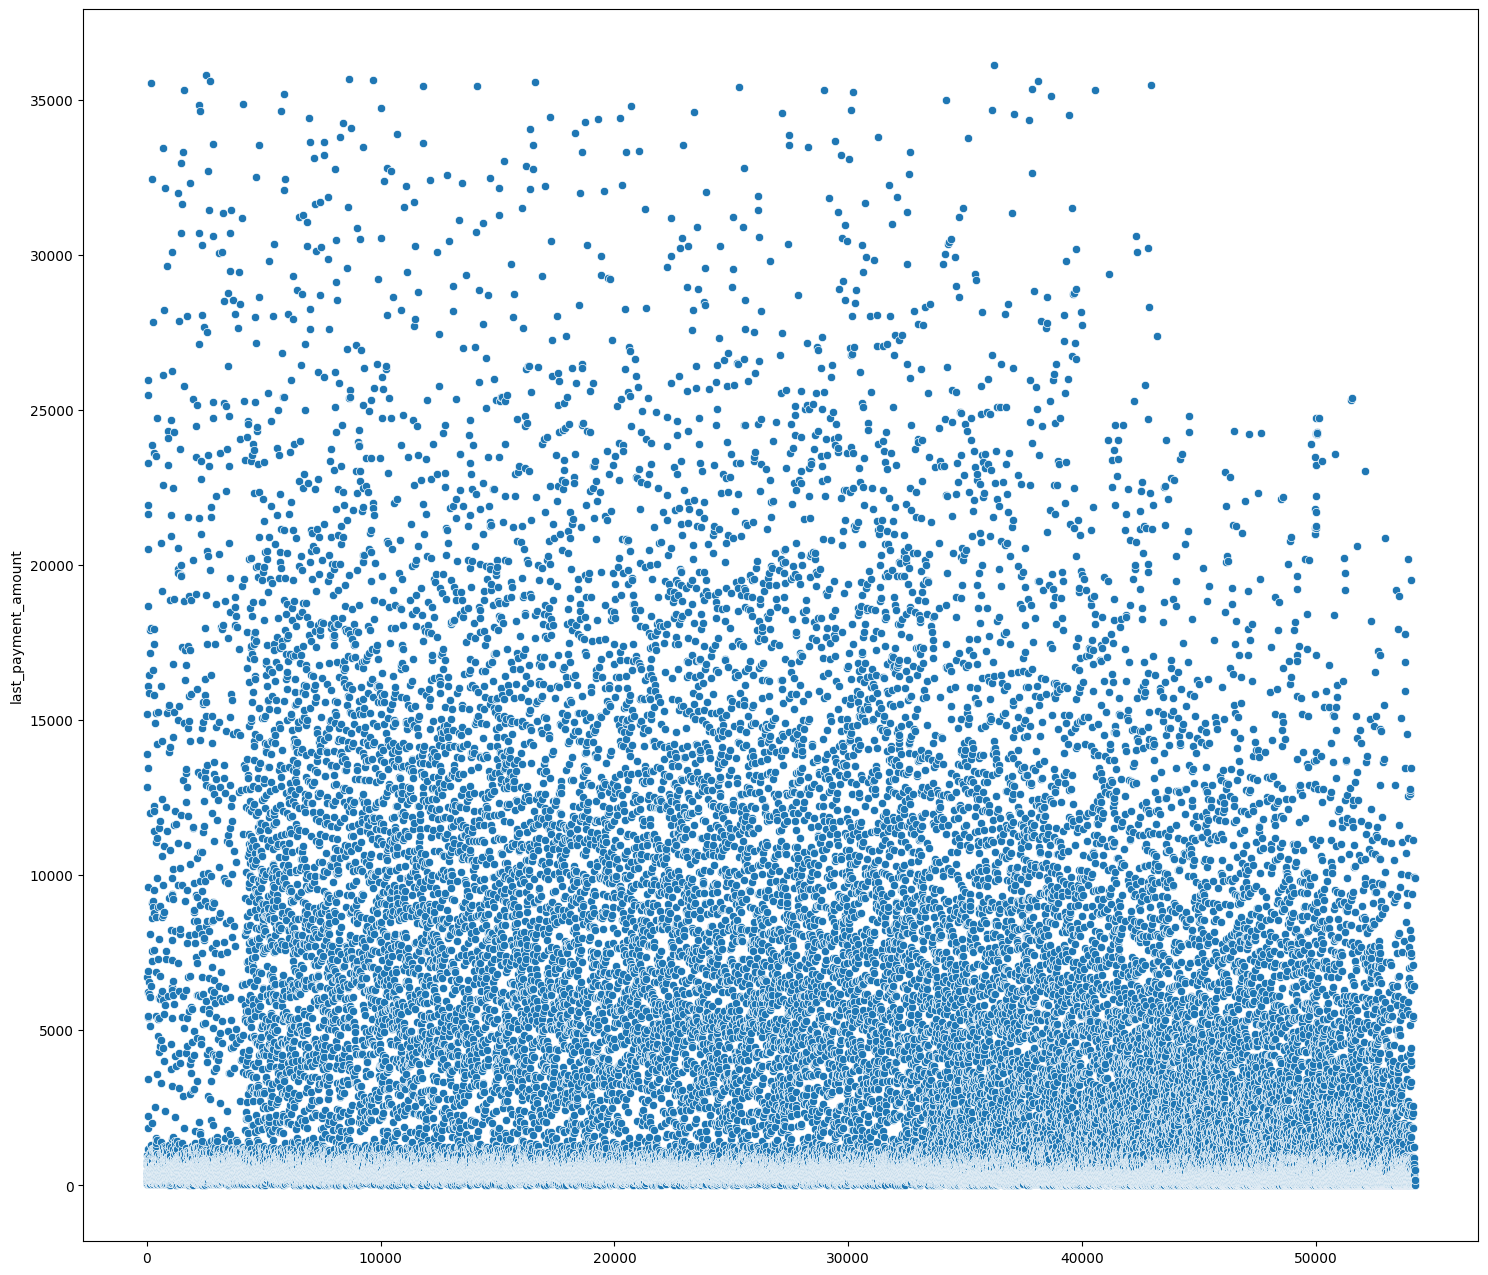

In [2]:
graph.check_outliers('last_payment_amount', 'scatter')

With this many datapoints, visual representations of graphs are likely not going to identify any outliers in the data, illustrated by the mess above. Perhaps statistical methods are the best bet. Let's try the Z-score method for some of the numerical columns, and show the top 20 largest z-scores. It is going to be a very arduous task to show me checking every individual column here, as there are over 20 numeric ones to go through. For now, I have picked out 5 columns which pose likely to have outliers, these are:

#TODO victims are: annual_inc(?), open_accounts(?), total_payment, total_rec_int, total_rec_late_fee(?), 

- annual_inc
- open_accouts
- total_payment
- total_rec_int
- total_rec_late_fee

Let's go one by one, and first look at the annuam income:


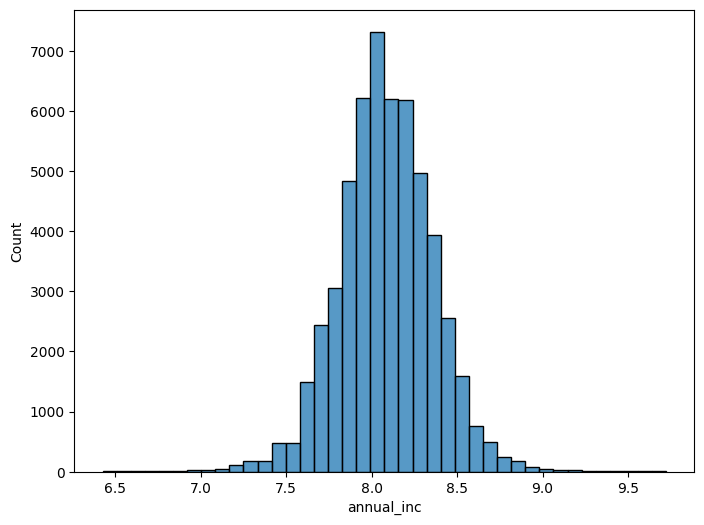

In [3]:
graph.check_outliers('annual_inc', 'histogram')

The distribution looks fair and it normalized. Let's check the zscores:

In [4]:
graph.check_outliers('annual_inc', method='zscore')

31270    4.743370
43795    4.756959
18820    4.760337
44511    4.816642
3982     4.842429
4389     4.842429
51988   -4.903816
47800    4.965132
54060   -5.111994
53933   -5.111994
45286    5.132204
51447   -5.161650
38530    5.196655
44719   -5.201519
51907   -5.201519
50586   -5.201519
46558   -5.201519
50601    5.331625
50437    5.418849
32650    5.492966
48697   -5.495880
47922   -5.560090
54214   -5.604018
36887    5.749952
3512    -5.838607
44958    5.848758
53778   -5.901579
28376    5.927530
53565    5.957715
53470   -6.033448
Name: annual_inc, dtype: float64

These datapoints all look fair and follow a steady absolute zscore, so there are not any clear outliers for this column. Remember here that my methodology is to only identify CLEAR outliers which do not belong in the dataset.

Next, open_accounts

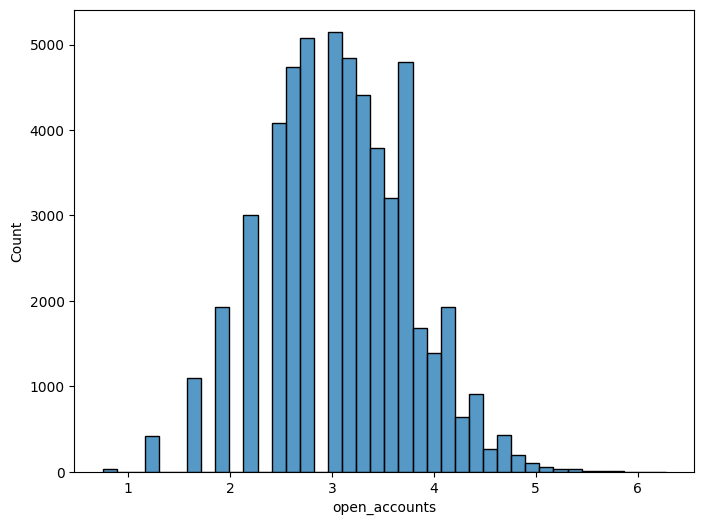

open_accounts
2.971066    5150
2.801028    5077
3.128203    4846
2.615398    4738
3.274466    4415
2.410498    4080
3.411426    3784
3.540328    3202
2.181085    2999
3.662173    2649
3.777782    2144
1.919280    1927
3.887835    1684
3.992904    1385
1.612372    1093
4.093473    1082
4.189957     843
4.282716     638
4.372059     499
1.237601     415
4.458260     406
4.541560     270
4.622170     241
4.700280     185
4.776060     115
4.849662      80
4.921222      57
4.990865      40
0.746857      33
5.058704      31
5.124841      30
5.189371      17
5.252379      16
5.313945      15
5.374141       8
5.602502       8
5.709997       5
5.813536       4
5.547159       4
5.433035       4
5.762240       3
5.490688       3
6.281723       1
5.962103       1
6.057050       1
6.193904       1
5.656766       1
6.009966       1
Name: count, dtype: int64

In [5]:
graph.check_outliers('open_accounts', 'histogram')
df['open_accounts'].value_counts()

This column originally contained discrete data, but was changed in the skew trans

#TODO fix this :/

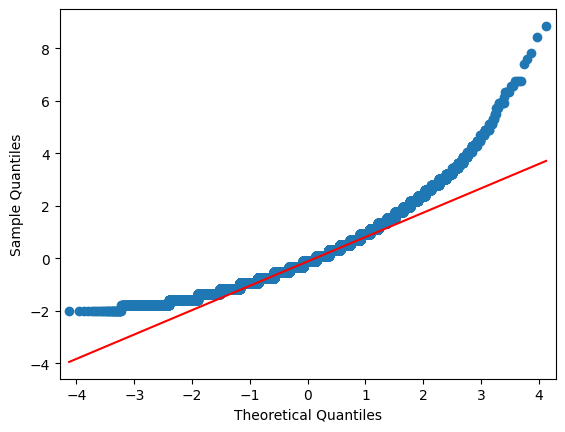

In [6]:
womp = pd.read_csv('loan_payments_data.csv')
#womp['open_accounts'].hist()

from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qq_plot = qqplot(womp['open_accounts'] , scale=1 ,line='q', fit=True)
pyplot.show()

Next, let's look at total_payment:

In [13]:
graph.check_outliers('int_rate', 'zscore')
#df['int_rate'].value_counts()

#TODO real victims are total_rec_late_fee

int_rate
11.99    1848
10.99    1842
12.99    1609
15.61    1158
7.90     1045
         ... 
24.59       1
18.49       1
12.62       1
17.41       1
15.38       1
Name: count, Length: 457, dtype: int64

In [15]:
from data_info import DataFrameInfo

missing_value_columns = DataFrameInfo()
print(missing_value_columns.percentage_of_missing(df, 0))

funded_amount                 5.544799
term                          8.799395
int_rate                      9.531449
employment_length             3.905515
last_payment_date             0.134609
last_credit_pull_date         0.012908
collections_12_mths_ex_med    0.094042
zscore                        9.531449
dtype: float64
